## Static dataset creation
This notebook walks through how to use the modules to create and save a static dataset for use in all of the statistical and ML methods. The method-focused notebooks show how to import and utilize this static dataset in inference.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data.data import MyDataLoader, DataPreparation

Use the `DataPreparation()` class from `io` to simulate some linear data with two levels of noise.

Low noise is $\sigma = 1$. High noise is $\sigma = 10$. Both use the same input xs and same priors. Let's simulate the low noise first.

In [2]:
data = DataPreparation()

In [3]:
size_df = 1000
noise = 'high'
data.sample_params_from_prior(size_df, 42)

In [4]:
# lookup dict
noise_to_sigma = {
    'low': 1,
    'medium': 5,
    'high': 10,
    'vhigh': 100
}

Select the noise profile. Right now the only option is `linear_homoskedastic`.

In [5]:
noise_profile = 'linear_homoskedastic'

Now select the type of noise injection. Options are 'feature' and 'predictive', where feature injects noise on x and predictive injects directly on y.

In [9]:
inject = 'predictive'

In [10]:
data.simulate_data(data.params,
                   noise_to_sigma[noise], 
                   simulation_name = noise_profile,
                   inject_type = inject
                    )

linear_homoskedastic simulation data generated,                 with noise injected type: predictive.


Let's take a look at this simulated dataset.

torch.Size([101000])
torch.Size([1000, 101])
torch.Size([101000])
torch.Size([1000, 101])
torch.Size([101000])
torch.Size([1000, 101])
torch.Size([101000])
torch.Size([1000, 101])
torch.Size([101000])
torch.Size([1000, 101])


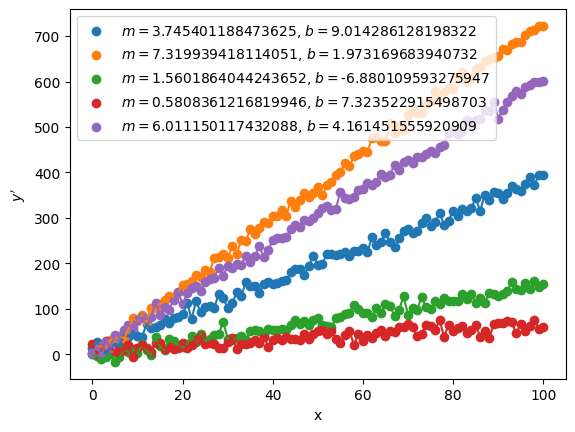

In [16]:
plt.clf()
for i in range(5):
    if inject == 'predictive':
        xs = np.reshape(data.input, (1000, 101))
        print(np.shape(data.input))
        print(np.shape(xs))
        plt.plot(xs[i], data.output[i])
        plt.scatter(xs[i], data.output[i],
                label = f'$m = ${data.params[i][0]}, $b = ${data.params[i][1]}')
    elif inject == 'feature':
        plt.plot(data.input[i], data.output[i])
        plt.scatter(data.input[i], data.output[i],
                    label = f'$m = ${data.params[i][0]}, $b = ${data.params[i][1]}')
plt.legend()
if inject == 'predictive':
    plt.xlabel('x')
    plt.ylabel(r'$y^{\prime}$')
elif inject == 'feature':
    plt.xlabel(r'$x^{\prime}$')
    plt.ylabel('y')
plt.show()
    

In [ ]:
# now make it into a dataframe
dict = data.get_dict()
dict

## Save the data to h5

In [ ]:
saver = MyDataLoader()

In [ ]:
# save the dataframe
saver.save_data_h5(f'{noise_profile}_{inject}_sigma_{noise_to_sigma[noise]}_size_{size_df}',
                   dict)

## Save for all noise levels and all inject styles

In [ ]:
noise_list = ['low', 'medium', 'high']
inject_list = ['feature', 'predictive']

for noise in noise_list:
    for injection in inject_list:
        data.simulate_data(data.params,
                           noise_to_sigma[noise], 
                           simulation_name = noise_profile,
                           inject_type = injection
                            )
        
        dict = data.get_dict()
        saver.save_data_h5(f'{noise_profile}_{injection}_sigma_{noise_to_sigma[noise]}_size_{size_df}',
                           dict)